This notebook will serve as a tutorial for the whole process. It will go over the full process from the raw data files until the final TUG time measurements.

The necessary libraries are present in the requirements.txt file

In [1]:
import pandas as pd
import numpy as np
import TUG_functions_kinetikos as ktks
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

The data files must originate from the mKinetikos app or other apps capable of generating similar files. An example of a raw file can be seen in the tug_example_data.csv file. This file contains two different TUG tests (block 86906 and block 86907).

In [2]:
raw_data_df = pd.read_csv('tug_example_data.csv')
raw_data_df

,tms_acc,x_acc,y_acc,z_acc,tms_gyr,x_gyr,y_gyr,z_gyr,tms_mag,x_mag,y_mag,z_mag,tms_ori,yaw,pitch,roll,blockID,testID,freq
0,20230915-14:02:48.545,0.057461,-2.044648,-9.593566,20230915-14:02:48.556,0.006490,-0.005727,0.010079,20230915-14:02:48.608,0.9525,25.109999,18.6600,20230915-14:02:48.546,0.000000,0.000000,0.000000,86906,1,100
1,20230915-14:02:48.548,0.068235,-2.044648,-9.678560,20230915-14:02:48.608,0.005880,-0.004505,0.011912,20230915-14:02:48.639,1.2975,24.697500,18.3000,20230915-14:02:48.549,0.000000,0.000000,0.000000,86906,1,100
2,20230915-14:02:48.608,0.022745,-2.133234,-9.558850,20230915-14:02:48.639,-0.005727,0.006490,0.005803,20230915-14:02:48.656,1.8000,24.697500,18.5025,20230915-14:02:48.609,0.000000,0.000000,0.000000,86906,1,100
3,20230915-14:02:48.639,0.061052,-2.059013,-9.591172,20230915-14:02:48.656,-0.005727,0.005269,0.004581,20230915-14:02:48.673,1.8000,24.802500,18.5025,20230915-14:02:48.639,0.069292,0.211785,-3.135503,86906,1,100
4,20230915-14:02:48.656,0.074220,-2.051831,-9.607931,20230915-14:02:48.673,-0.007559,0.000382,0.002138,20230915-14:02:48.695,1.7025,24.697500,18.5025,20230915-14:02:48.656,0.094622,0.209861,-3.134730,86906,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:06:34.628,1.325801,-0.491890,0.351947,86907,1,100
4453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:06:34.638,1.350376,-0.471625,0.335231,86907,1,100
4454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:06:34.648,1.296688,-0.488909,0.304697,86907,1,100
4455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:06:34.659,1.230138,-0.505357,0.278672,86907,1,100


This file contains **accelerometer** (_acc), **gyroscope** (_gyr) and **magnetometer** (_mag) data recorded during the TUG test. Each sensor has its own **timestamps** (tms_xxx). Moreover the file also contains **Euler angle** data (yaw, pitch, roll) and the respective timestamps (tms_ori). The **blockID**, **testID** (which represents the type of test done; 1-supervised 15-unsupervised) and the **sampling frequency** (freq).

After importing the raw data, a single block must be chosen for analysis. In this example, block 86906 will be used.

In [3]:
test_block = raw_data_df[raw_data_df['blockID'] == 86906]
test_block

,tms_acc,x_acc,y_acc,z_acc,tms_gyr,x_gyr,y_gyr,z_gyr,tms_mag,x_mag,y_mag,z_mag,tms_ori,yaw,pitch,roll,blockID,testID,freq
0,20230915-14:02:48.545,0.057461,-2.044648,-9.593566,20230915-14:02:48.556,0.006490,-0.005727,0.010079,20230915-14:02:48.608,0.9525,25.109999,18.6600,20230915-14:02:48.546,0.000000,0.000000,0.000000,86906,1,100
1,20230915-14:02:48.548,0.068235,-2.044648,-9.678560,20230915-14:02:48.608,0.005880,-0.004505,0.011912,20230915-14:02:48.639,1.2975,24.697500,18.3000,20230915-14:02:48.549,0.000000,0.000000,0.000000,86906,1,100
2,20230915-14:02:48.608,0.022745,-2.133234,-9.558850,20230915-14:02:48.639,-0.005727,0.006490,0.005803,20230915-14:02:48.656,1.8000,24.697500,18.5025,20230915-14:02:48.609,0.000000,0.000000,0.000000,86906,1,100
3,20230915-14:02:48.639,0.061052,-2.059013,-9.591172,20230915-14:02:48.656,-0.005727,0.005269,0.004581,20230915-14:02:48.673,1.8000,24.802500,18.5025,20230915-14:02:48.639,0.069292,0.211785,-3.135503,86906,1,100
4,20230915-14:02:48.656,0.074220,-2.051831,-9.607931,20230915-14:02:48.673,-0.007559,0.000382,0.002138,20230915-14:02:48.695,1.7025,24.697500,18.5025,20230915-14:02:48.656,0.094622,0.209861,-3.134730,86906,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:03:11.115,0.642469,-0.041300,0.072006,86906,1,100
2083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:03:11.125,0.432032,-0.101787,-0.008552,86906,1,100
2084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:03:11.135,0.340436,-0.125127,-0.044918,86906,1,100
2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20230915-14:03:11.145,0.387064,-0.099149,-0.005787,86906,1,100


Afterwards, the timestamps must be converted to the appropriate format. This is done through the *convert_and_format_timestamp* function. This function is included in the **TUG_functions_kinetikos** module. The data is also trimmed before alignment using the *trim_timeseries* function

In [4]:
test_block = ktks.convert_and_format_timestamp(test_block)
test_block = ktks.trim_timeseries(test_block, 'tms_acc')
test_block

,tms_acc,x_acc,y_acc,z_acc,tms_gyr,x_gyr,y_gyr,z_gyr,tms_mag,x_mag,y_mag,z_mag,tms_ori,yaw,pitch,roll,blockID,testID,freq
0,2023-09-15 14:02:48.545,0.057461,-2.044648,-9.593566,2023-09-15 14:02:48.556,0.006490,-0.005727,0.010079,2023-09-15 14:02:48.608,0.9525,25.109999,18.6600,2023-09-15 14:02:48.546,0.000000,0.000000,0.000000,86906,1,100
1,2023-09-15 14:02:48.548,0.068235,-2.044648,-9.678560,2023-09-15 14:02:48.608,0.005880,-0.004505,0.011912,2023-09-15 14:02:48.639,1.2975,24.697500,18.3000,2023-09-15 14:02:48.549,0.000000,0.000000,0.000000,86906,1,100
2,2023-09-15 14:02:48.608,0.022745,-2.133234,-9.558850,2023-09-15 14:02:48.639,-0.005727,0.006490,0.005803,2023-09-15 14:02:48.656,1.8000,24.697500,18.5025,2023-09-15 14:02:48.609,0.000000,0.000000,0.000000,86906,1,100
3,2023-09-15 14:02:48.639,0.061052,-2.059013,-9.591172,2023-09-15 14:02:48.656,-0.005727,0.005269,0.004581,2023-09-15 14:02:48.673,1.8000,24.802500,18.5025,2023-09-15 14:02:48.639,0.069292,0.211785,-3.135503,86906,1,100
4,2023-09-15 14:02:48.656,0.074220,-2.051831,-9.607931,2023-09-15 14:02:48.673,-0.007559,0.000382,0.002138,2023-09-15 14:02:48.695,1.7025,24.697500,18.5025,2023-09-15 14:02:48.656,0.094622,0.209861,-3.134730,86906,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2023-09-15 14:03:11.115,0.642469,-0.041300,0.072006,86906,1,100
2083,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2023-09-15 14:03:11.125,0.432032,-0.101787,-0.008552,86906,1,100
2084,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2023-09-15 14:03:11.135,0.340436,-0.125127,-0.044918,86906,1,100
2085,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2023-09-15 14:03:11.145,0.387064,-0.099149,-0.005787,86906,1,100


After formatting the timestamps, the data will be aligned. This is done in order to synchronize the sensor data, as each one has a different timeseries. Firstly, a column hierarchy must be defined, which will define the order used for the alignment. The *align_timeseries* function will then align the data resulting in a DataFrame containing a single timeseries for all sensors. For additional information regarding the process, check the documentation or the Tese.pdf document. The aligned DataFrame is also interpolated afterwards in order to eliminate any NaN that might be inserted during the alignment process. The Euler angle columns are also dropped as they will not be used.

In [5]:
col_hierarchy = ['tms_acc', 'tms_gyr', 'tms_mag']
aligned_test_block = ktks.align_timeseries(df=test_block, col_hierarchy=col_hierarchy, strategy='median_delta',
                                   time_df=test_block, ref_col=col_hierarchy[0])
aligned_test_block = aligned_test_block.interpolate(method='linear')
aligned_test_block.drop(['tms_ori', 'yaw', 'pitch', 'roll'], axis=1, inplace=True)

This concludes the initial pre-processing stage. It is recomended that the results of this process are saved as the alignment process can be time consuming. A simplified script containing these steps can be found in *import_and_align.py*.

If starting with a processed file the *convert_and_format_timestamp* function must be used on the imported data before any of the other functions can be called.

In [6]:
aligned_test_block = pd.read_csv('tug_86906_aligned.csv')
aligned_test_block = ktks.convert_and_format_timestamp(aligned_test_block)

Now that the data has been properly aligned and formatted, the reorientation process can begin. This will be done using the *rotate_sensors* function, which takes in sensor data and rotates it to a global reference plane.

In [7]:
timestamps, accelerometer, gyroscope, magnetometer, rot_acc, rot_gyr, rot_mag, rot_m, Q = ktks.rotate_sensors(aligned_test_block, 'MARG')

After rotating the sensor data, the relevant acceleration component is extracted and the data is normalized and smoothed using a Butterworth filter.

In [8]:
global_acc = accelerometer - rot_acc
# Normalization and filtering of sensor data
norm_acc = (global_acc - np.mean(global_acc, axis=0)) / np.std(global_acc, axis=0)

xa_smooth = ktks.butter_lowpass_filter(norm_acc[:, 0], 0.5, 100, 'low')
ya_smooth = ktks.butter_lowpass_filter(norm_acc[:, 1], 0.5, 100, 'low')
za_smooth = ktks.butter_lowpass_filter(norm_acc[:, 2], 0.5, 100, 'low')

The correct acceleration axis is done through visual analysis of the smoothed signals. The axis chosen must have the bridge pattern associated with the TUG. In this case the correct one is the *z* axis.

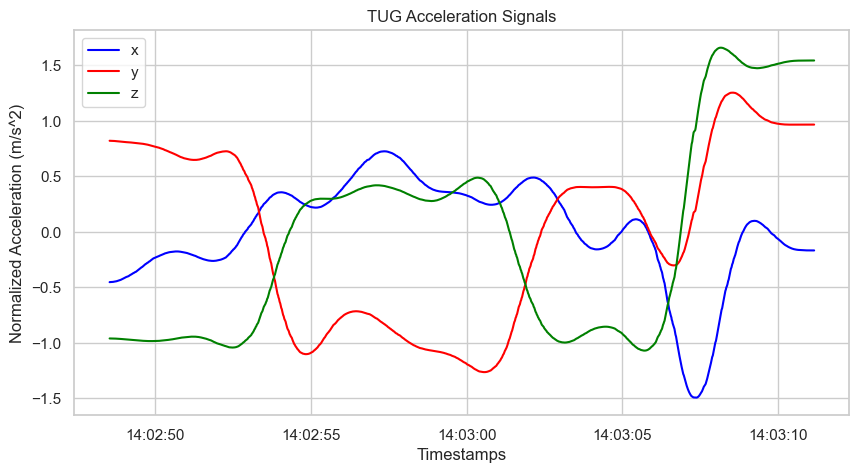

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=timestamps, y=xa_smooth, color='blue', label='x')
sns.lineplot(x=timestamps, y=ya_smooth, color='red', label='y')
sns.lineplot(x=timestamps, y=za_smooth, color='green', label='z')
plt.xlabel('Timestamps')
plt.ylabel('Normalized Acceleration (m/s^2)')
plt.title('TUG Acceleration Signals')
plt.legend()
plt.show()

Additionally, in some cases, the cumulative sum gyroscope must also be manually selected. This is also done by visual analysis of the signal. The correct axis should have one of the two largest peaks coincide with the middle of the bridge pattern of the accelerometer signal. In this case, this would be the y axis.

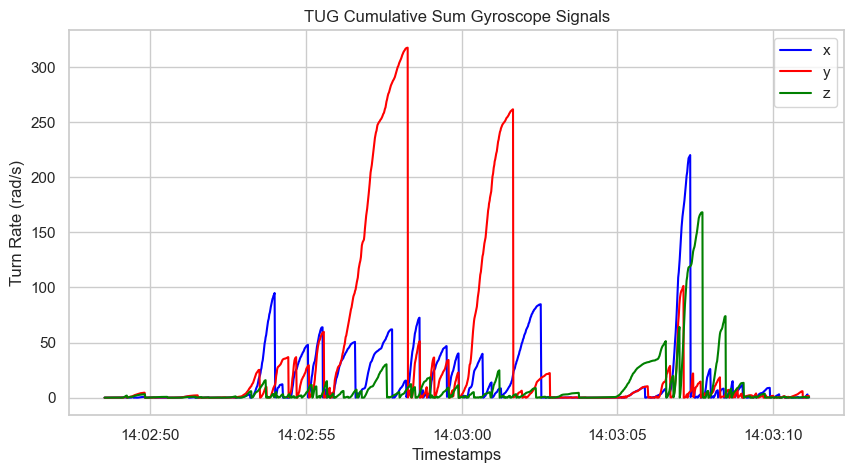

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=timestamps, y=np.abs(ktks.cumsum_arr(gyroscope[:, 0])), color='blue', label='x')
sns.lineplot(x=timestamps, y=np.abs(ktks.cumsum_arr(gyroscope[:, 1])), color='red', label='y')
sns.lineplot(x=timestamps, y=np.abs(ktks.cumsum_arr(gyroscope[:, 2])), color='green', label='z')
plt.xlabel('Timestamps')
plt.ylabel('Turn Rate (rad/s)')
plt.title('TUG Cumulative Sum Gyroscope Signals')
plt.legend()
plt.show()

This marks the end of the signal processing and selection stage. The filtered acceleration signals, the gyroscope signals and the timestamps will be used in order to determine the starting and ending points of the TUG test. The manually chosen signals will be used in this tutorial, however, future developments should eliminate the need for this step.

To measure the TUG test time, the *tug_roi* function is employed, identifying the initiation and conclusion events of the TUG test within the chosen acceleration axis. This process begins by identifying the region where the 180-degree turn occurs. Subsequently, the signal is segmented into two parts, with the initial segment processed to identify the sit-to-stand phase and the subsequent segment processed to pinpoint the stand-to-sit phase. In this tutorial, each separate step will be shown, however the *roi_tug* function automatically does each step sequentially without the need for further user input.

As mentioned, the first step is identifying the turning stage. This is done by the *turn_roi* function, which attempts to find the first peak of the cumulative sum of the gyroscope signal above a certain threshold. This indicates the 180 degree turn that marks the halfway point of the TUG test.

Timestamp('2023-09-15 14:02:57.401000')

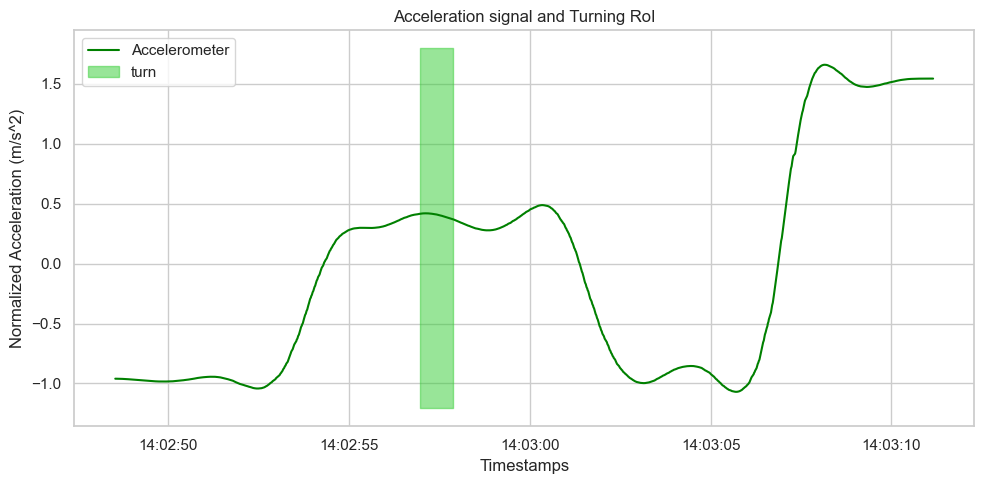

In [11]:
turn_index = ktks.turn_roi(gyroscope=gyroscope, percentile=7.5, timestamps=timestamps, graphs=True, accelerometer=za_smooth, window_size=75)
timestamps[turn_index]

As shown in the figure, the turn stage sits roughly at the middle of the bridge pattern. The next step is finding the sit-to-stand RoI. This is done using the *standing_roi* function. Firstly, the function attemps to find a region in the first part of the signal that contains a sharp increase in acceleration, which marks the transition from sitting to standing. Then it parses through the signal backwards, checking if a consistent trend of deceleration is maintained or an inflection point is found, indicating the starting point of the sit-to-stand phase of the test.

Before calling the function, the derivative of the acceleration signal must be calculated, as this allows for easy identification of sharp changes in the acceleration signal. The *tug_roi* function does this step automatically and it will only be shown for the purposes of the tutorial,

In [12]:
time_numerical = np.array([(t - timestamps[0]).total_seconds() / (24 * 3600) for t in timestamps]) * 1E5
acc_der = np.gradient(za_smooth, time_numerical)
acc_der = ktks.butter_lowpass_filter(acc_der, 1, 100, 'low')

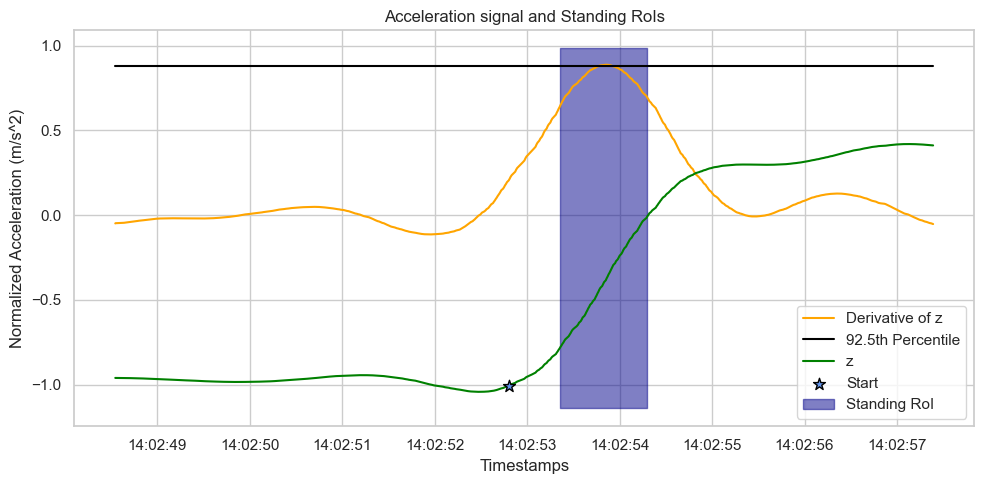

In [13]:
stand_index = ktks.standing_roi(timestamps=timestamps, turn_index=turn_index, acc_der=acc_der, sig_a=za_smooth, percentile=7.5, window_size=75, min_number_slopes=20, der_slope_window=6, slope_threshold=0.2, graphs=True)

The figure shows both the derivative and the acceleration signal. The starting point and the RoI can both be seen in the regions in which they would be expected.

The next step is identifying the stand-to-sit phase of the TUG test and marking the ending point of this phase. The process used is similar to the one in the *standing_roi* function. This process is done by the *sitting_roi* function, which slightly differs from the previous one in how the region of the signal analyzed is chosen. This region starts at the turn index and has a length that is slightly larger than the distance between the turn and standing points, in order to account for the turn done before sitting down.

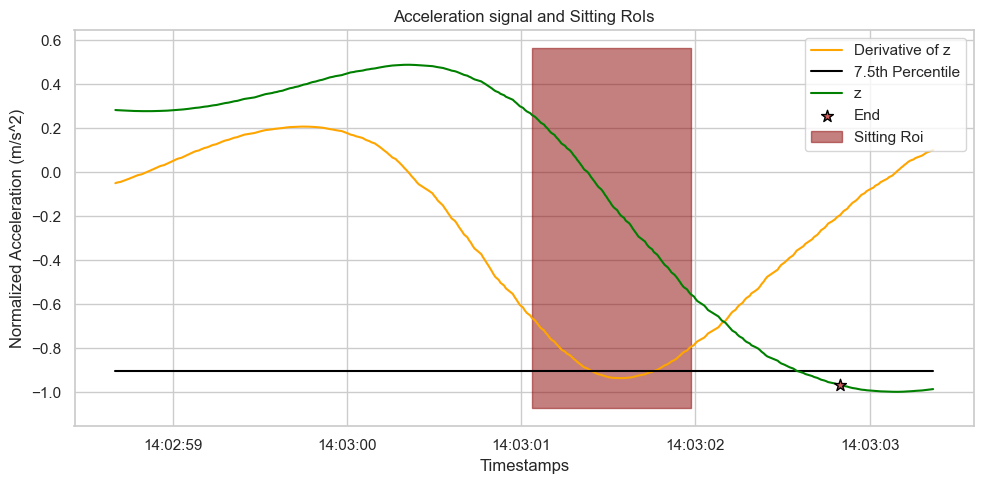

In [14]:
sit_index = ktks.sitting_roi(timestamps=timestamps, turn_index=turn_index, test_start=stand_index[1], acc_der=acc_der, sig_a=za_smooth, percentile=7.5,
                window_size=75, min_number_slopes=20, der_slope_window=5, slope_threshold=0.2, graphs=True)

As with the previous figure, the locations of the ending point and the RoI are in accordance to expectations. The final step is calculating the time difference between the starting and ending points of the test.

This is done by the *roi_tug* function, which also incorporates all of the previous steps.

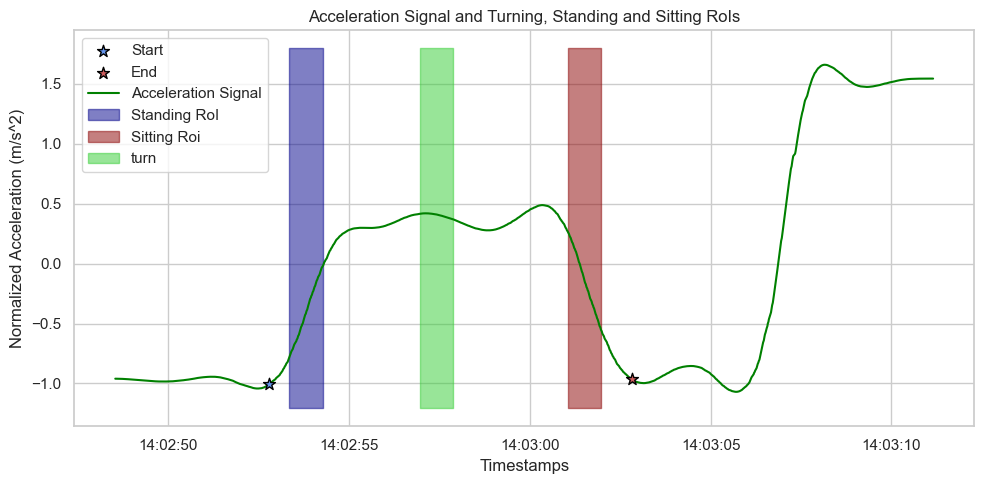

Total TUG time: 10.0 seconds
Time before turn time: 4.6 seconds
Time after turn: 5.4 seconds
Time before turn is -17.0% the size of Time after turn.


In [16]:
tug = ktks.roi_tug(timestamps=timestamps, gyroscope=gyroscope, sig_a=za_smooth, percentile_step=7.5, window_size=75,
            min_number_slopes=20, der_slope_window=6, slope_threshold=0.2, plots=True, times=True)